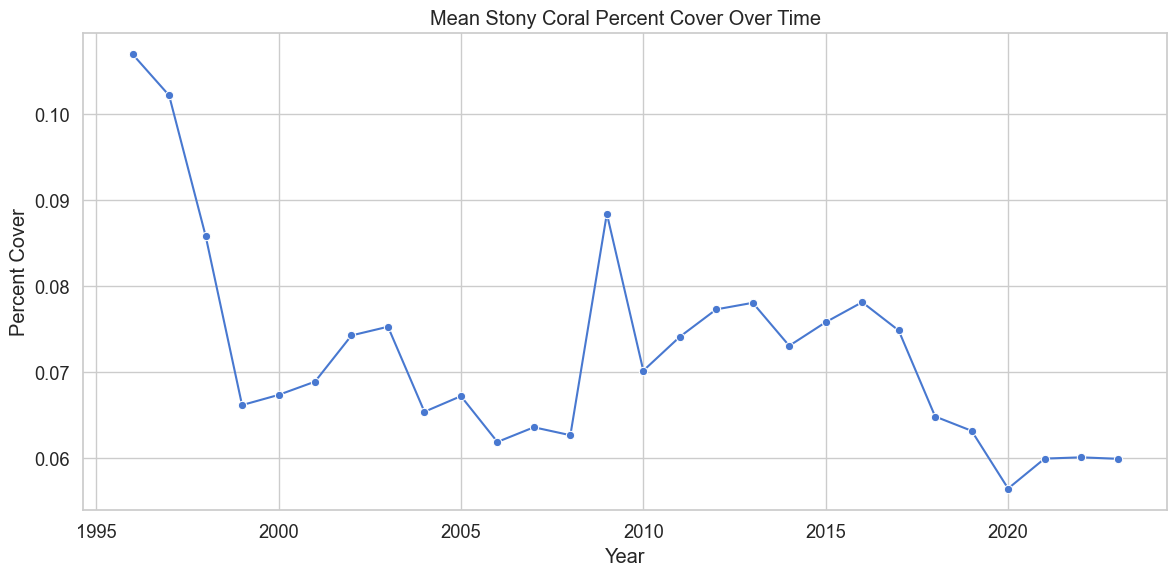

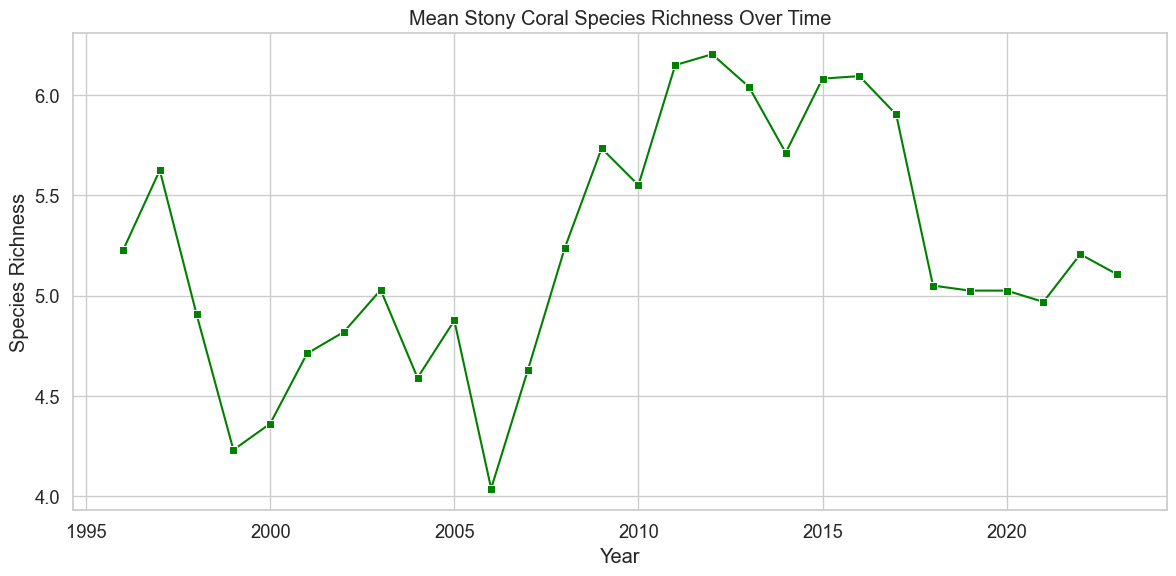

In [ ]:
### Determine long-term trends in stony coral percent cover and species richness. ###

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your stony coral percent cover dataset
df = pd.read_csv("../data/processed_data/CREMP_Pcover_2023_StonyCoralSpecies.csv")

# Create 'Total_StonyCoral' column by summing all species columns
species_cols = df.columns[10:-1]  # Assuming species start at column 10 and end before 'row_index'
df['Total_StonyCoral'] = df[species_cols].sum(axis=1)

# Calculate mean percent cover per year
mean_cover_per_year = df.groupby('Year')['Total_StonyCoral'].mean().reset_index()

# Calculate species richness per year (species with >0 cover)
df['Species_Richness'] = df[species_cols].gt(0).sum(axis=1)
mean_richness_per_year = df.groupby('Year')['Species_Richness'].mean().reset_index()

# Plotting
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Plot 1: Percent cover
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_cover_per_year, x='Year', y='Total_StonyCoral', marker='o')
plt.title('Mean Stony Coral Percent Cover Over Time')
plt.ylabel('Percent Cover')
plt.xlabel('Year')
plt.tight_layout()
plt.savefig("../objectives/stony_coral_percent_cover_over_time.png")
plt.show()
plt.close()  # Close the first plot after saving

# Plot 2: Species richness
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_richness_per_year, x='Year', y='Species_Richness', marker='s', color='green')
plt.title('Mean Stony Coral Species Richness Over Time')
plt.ylabel('Species Richness')
plt.xlabel('Year')
plt.tight_layout()
plt.savefig("../objectives/stony_coral_species_richness_over_time.png")
plt.show()
plt.close()  # Close the second plot after saving
